Import required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
df=pd.read_csv("ML Assignment.csv")

In [3]:
df.isnull().sum()

Are_you_an_Postgraduate_student                                             0
What_is_your_gender                                                         0
Are_you_a_full-time_student                                                 0
Do_you_live_in_a_hostel                                                     0
Do_you_prefer_online_classes_over_offline_classes                           0
Have_you_participated_in_any_university_clubs                               0
Are_you_satisfied_with_the_university's_facilities                          0
Do_you_commute_to_the_university_daily                                      0
Are_you_currently_employed                                                  0
Do_you_find_your_coursework_manageable                                      0
Are_you_a_pursuing_a_UG_or_PG_Degree                                        0
Are_you_planning_to_pursue_higher_studies_after_graduation                  0
Do_you_feel_stressed_about_exams                                

In [4]:
df = df.replace({'Yes': 1, 'No': 0})
df = pd.get_dummies(df, columns=['What_is_your_gender', 'Are_you_a_pursuing_a_UG_or_PG_Degree'], drop_first=True)
df = df.infer_objects(copy=False) 
df.head()

C:\Users\nigel\AppData\Local\Temp\ipykernel_14304\630009743.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes': 1, 'No': 0})


,Are_you_an_Postgraduate_student,Are_you_a_full-time_student,Do_you_live_in_a_hostel,Do_you_prefer_online_classes_over_offline_classes,Have_you_participated_in_any_university_clubs,Are_you_satisfied_with_the_university's_facilities,Do_you_commute_to_the_university_daily,Are_you_currently_employed,Do_you_find_your_coursework_manageable,Are_you_planning_to_pursue_higher_studies_after_graduation,...,Have_you_ever_taken_a_gap_semester,Are_you_involved_in_sports_activities,Do_you_prefer_studying_alone_rather_than_in_groups,Do_you_often_use_the_university_library,Have_you_ever_taken_a_leadership_role_in_a_student_organization,Do_you_prefer_practical_learning_over_theoretical_learning,Do_you_think_the_university_should_offer_more_extracurricular_activities,Would_you_recommend_your_university_to_others,What_is_your_gender_Male,Are_you_a_pursuing_a_UG_or_PG_Degree_UG
0,1,1,1,0,0,1,1,0,1,0,...,0,1,1,1,0,1,1,1,True,False
1,1,1,1,0,0,1,1,0,1,1,...,0,0,1,0,1,1,1,1,False,False
2,1,1,1,0,1,0,0,0,1,0,...,0,1,0,0,1,1,1,0,True,False
3,1,1,1,0,1,0,0,1,0,1,...,0,0,1,1,1,1,1,0,False,False
4,1,0,0,0,0,1,1,0,1,1,...,1,0,1,0,1,1,1,1,False,False


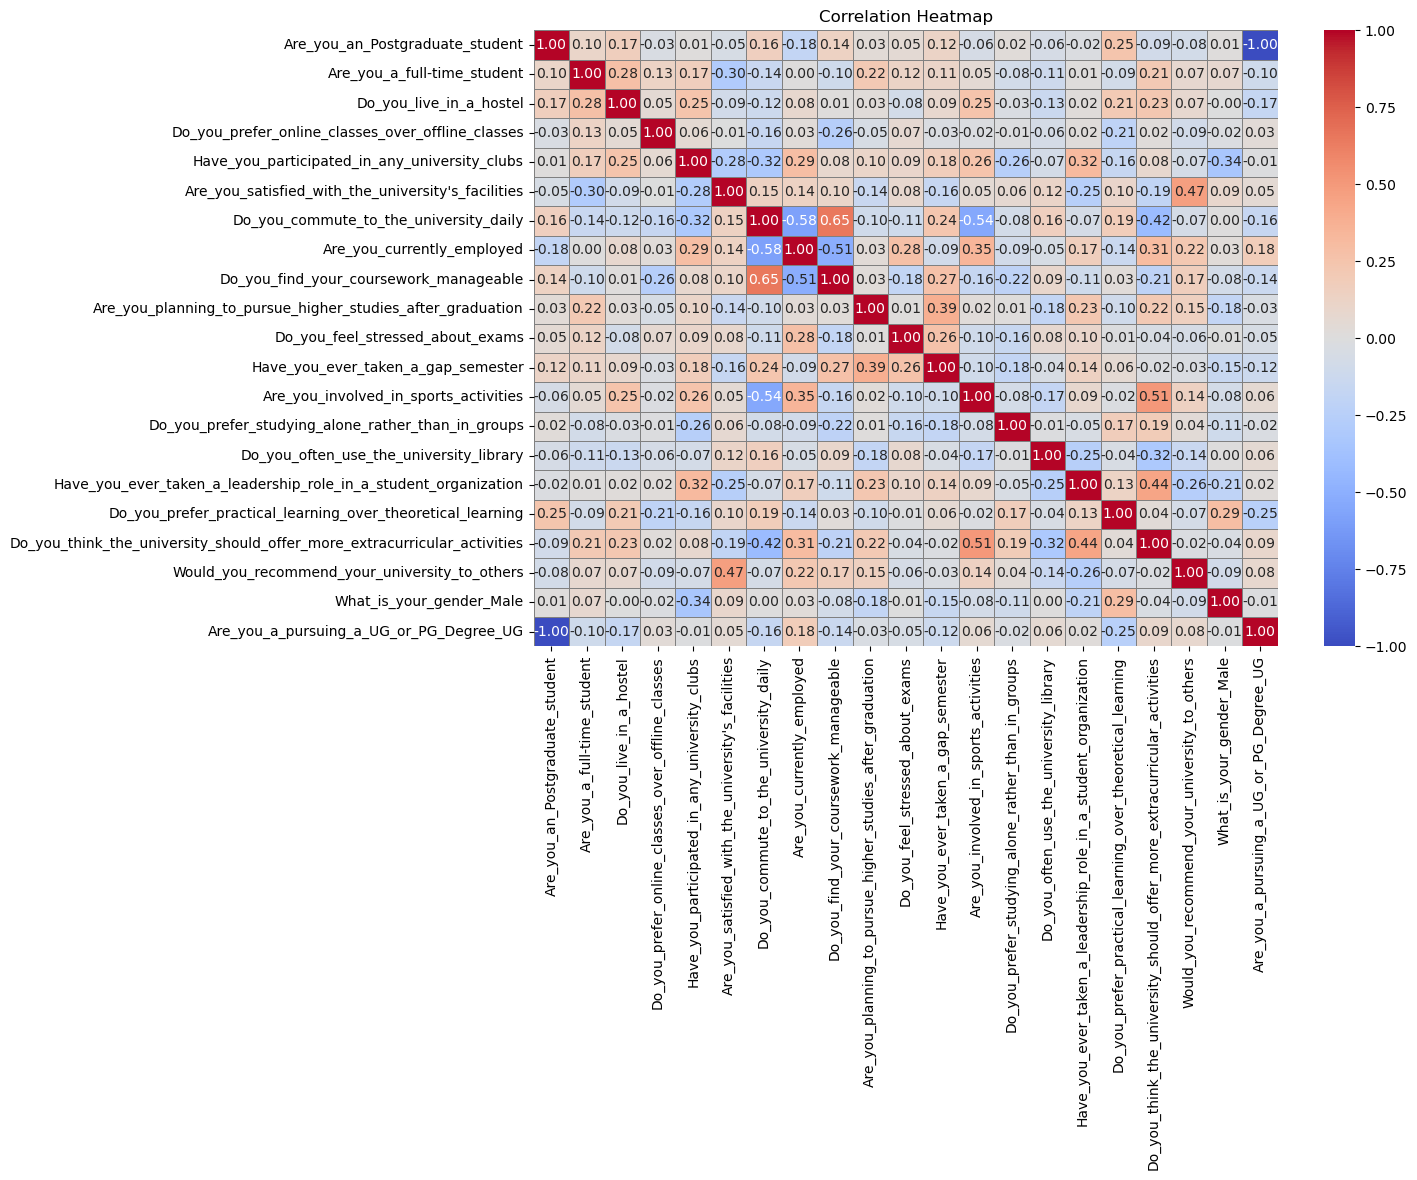

In [6]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='gray')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
target= [
    'Would_you_recommend_your_university_to_others',
    'Are_you_satisfied_with_the_university\'s_facilities',
    'Do_you_prefer_online_classes_over_offline_classes',
    'Do_you_live_in_a_hostel'
]

In [10]:
X = df.drop(columns=target)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for col in target:
    print(f"{col} distribution:\n{y[col].value_counts(normalize=True)}\n")

Would_you_recommend_your_university_to_others distribution:
Would_you_recommend_your_university_to_others
1    0.546053
0    0.453947
Name: proportion, dtype: float64

Are_you_satisfied_with_the_university's_facilities distribution:
Are_you_satisfied_with_the_university's_facilities
1    0.595395
0    0.404605
Name: proportion, dtype: float64

Do_you_prefer_online_classes_over_offline_classes distribution:
Do_you_prefer_online_classes_over_offline_classes
0    0.572368
1    0.427632
Name: proportion, dtype: float64

Do_you_live_in_a_hostel distribution:
Do_you_live_in_a_hostel
0    0.605263
1    0.394737
Name: proportion, dtype: float64



Check the skewness of data

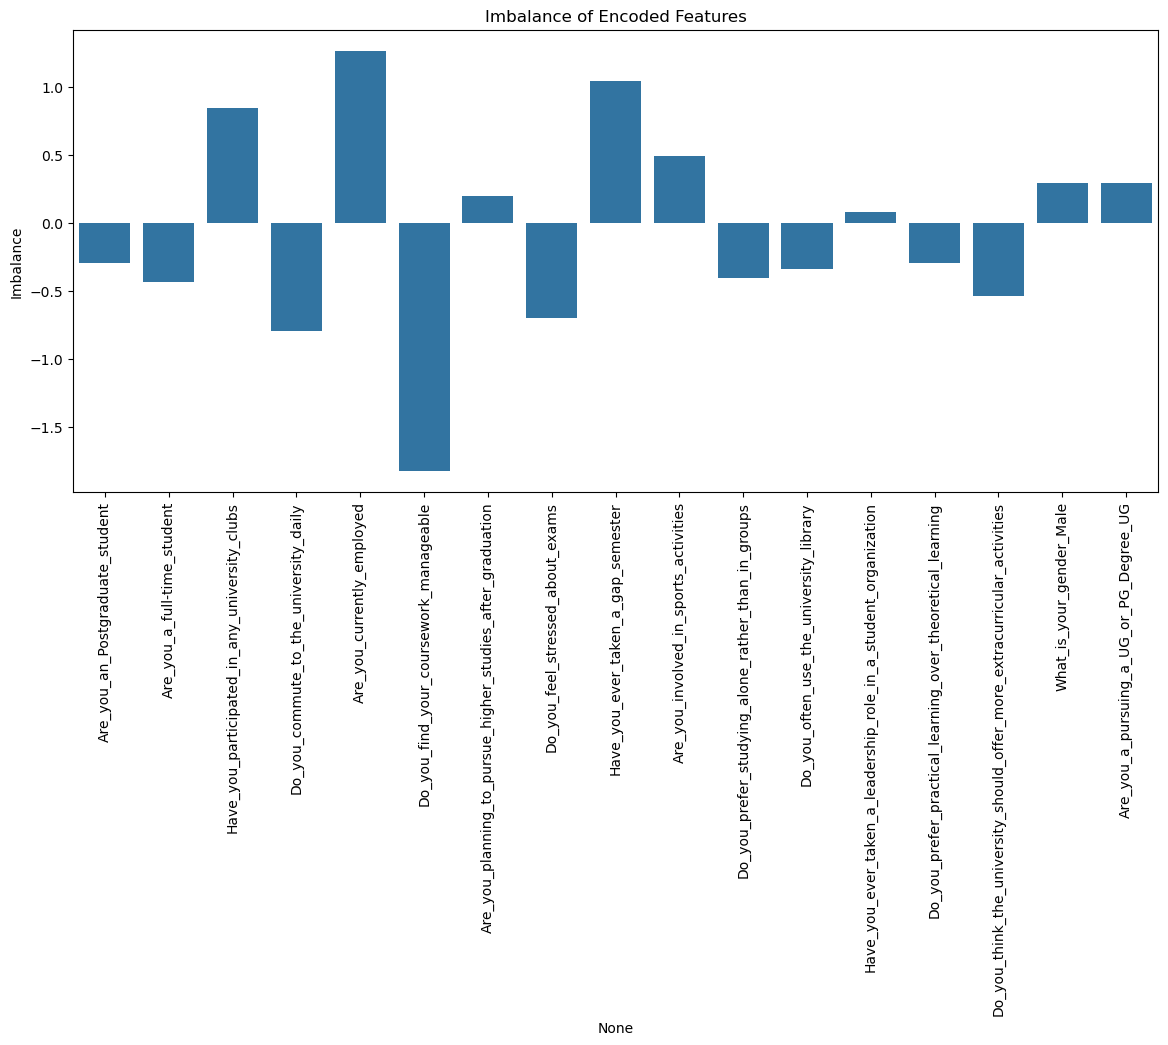

In [11]:
imbalance = df.drop(columns=target).skew()
plt.figure(figsize=(14, 6))
sns.barplot(x=imbalance.index, y=imbalance.values)
plt.title("Imbalance of Encoded Features")
plt.xticks(rotation=90)
plt.ylabel("Imbalance")
plt.show()

Applying Standardization

## Logistic Regression

In [12]:
l_reg= MultiOutputClassifier(LogisticRegression(max_iter=1000))
l_reg.fit(X_train_scaled, y_train)
y_pred_lr = l_reg.predict(X_test_scaled)
target_names = y_test.columns

for i, name in enumerate(target_names):
    print(f"\nConfusion Matrix of '{name}':")
    print(confusion_matrix(y_test.iloc[:, i], y_pred_lr[:, i]))
    print(f"\nClassification Report for '{name}':")
    print(classification_report(y_test.iloc[:, i], y_pred_lr[:, i]))


Confusion Matrix of 'Would_you_recommend_your_university_to_others':
[[32  8]
 [ 6 46]]

Classification Report for 'Would_you_recommend_your_university_to_others':
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        40
           1       0.85      0.88      0.87        52

    accuracy                           0.85        92
   macro avg       0.85      0.84      0.84        92
weighted avg       0.85      0.85      0.85        92


Confusion Matrix of 'Are_you_satisfied_with_the_university's_facilities':
[[28  9]
 [ 5 50]]

Classification Report for 'Are_you_satisfied_with_the_university's_facilities':
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        37
           1       0.85      0.91      0.88        55

    accuracy                           0.85        92
   macro avg       0.85      0.83      0.84        92
weighted avg       0.85      0.85      0.85        92


Confu

# Multi-Layer Perceptron Classifier

In [8]:
mlp= MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=[100,100,100],max_iter=1000))
mlp.fit(X_train_scaled,y_train)
y_pred_ann=mlp.predict(X_test_scaled)

for i, column in enumerate(y.columns):
    print(f"\n==== {column} ====")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test.iloc[:, i], y_pred_ann[:, i]))
    print("\nClassification Report:")
    print(classification_report(y_test.iloc[:, i], y_pred_ann[:, i]))


==== Would_you_recommend_your_university_to_others ====
Confusion Matrix:
[[39  1]
 [ 0 52]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.98      1.00      0.99        52

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92


==== Are_you_satisfied_with_the_university's_facilities ====
Confusion Matrix:
[[29  8]
 [ 5 50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.82        37
           1       0.86      0.91      0.88        55

    accuracy                           0.86        92
   macro avg       0.86      0.85      0.85        92
weighted avg       0.86      0.86      0.86        92


==== Do_you_prefer_online_classes_over_offline_classes ====
Confusion Matrix:
[[33 17]
 [24 18]]

Classi

# Random Forest Classifier

In [9]:
rf= MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

for i, col in enumerate(y.columns):
    print(f"\n--- Evaluation for target: '{col}' ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test.iloc[:, i], y_pred_rf[:, i]))
    print("Classification Report:")
    print(classification_report(y_test.iloc[:, i], y_pred_rf[:, i]))


--- Evaluation for target: 'Would_you_recommend_your_university_to_others' ---
Confusion Matrix:
[[38  2]
 [ 0 52]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.96      1.00      0.98        52

    accuracy                           0.98        92
   macro avg       0.98      0.97      0.98        92
weighted avg       0.98      0.98      0.98        92


--- Evaluation for target: 'Are_you_satisfied_with_the_university's_facilities' ---
Confusion Matrix:
[[28  9]
 [ 2 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        37
           1       0.85      0.96      0.91        55

    accuracy                           0.88        92
   macro avg       0.89      0.86      0.87        92
weighted avg       0.89      0.88      0.88        92


--- Evaluation for target: 'Do_you_prefer_online_classes_ove

# Support Vector Machine

In [15]:
svm= MultiOutputClassifier(SVC(kernel='linear', probability=True))
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

for i, col in enumerate(y.columns):
    print(f"\n--- Evaluation for SVM target: '{col}' ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test.iloc[:, i], y_pred_svm[:, i]))
    print("Classification Report:")
    print(classification_report(y_test.iloc[:, i], y_pred_svm[:, i]))


--- Evaluation for SVM target: 'Would_you_recommend_your_university_to_others' ---
Confusion Matrix:
[[31  9]
 [ 8 44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        40
           1       0.83      0.85      0.84        52

    accuracy                           0.82        92
   macro avg       0.81      0.81      0.81        92
weighted avg       0.81      0.82      0.81        92


--- Evaluation for SVM target: 'Are_you_satisfied_with_the_university's_facilities' ---
Confusion Matrix:
[[24 13]
 [ 4 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.65      0.74        37
           1       0.80      0.93      0.86        55

    accuracy                           0.82        92
   macro avg       0.83      0.79      0.80        92
weighted avg       0.82      0.82      0.81        92


--- Evaluation for SVM target: 'Do_you_prefer_online

In [16]:
svm_poly= MultiOutputClassifier(SVC(kernel='poly', probability=True))
svm_poly.fit(X_train_scaled, y_train)
y_pred_svm_poly =svm_poly.predict(X_test_scaled)

for i, col in enumerate(y.columns):
    print(f"\n--- Evaluation for SVM target: '{col}' ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test.iloc[:, i], y_pred_svm_poly[:, i]))
    print("Classification Report:")
    print(classification_report(y_test.iloc[:, i], y_pred_svm_poly[:, i]))


--- Evaluation for SVM target: 'Would_you_recommend_your_university_to_others' ---
Confusion Matrix:
[[40  0]
 [ 0 52]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        52

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92


--- Evaluation for SVM target: 'Are_you_satisfied_with_the_university's_facilities' ---
Confusion Matrix:
[[27 10]
 [ 0 55]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.73      0.84        37
           1       0.85      1.00      0.92        55

    accuracy                           0.89        92
   macro avg       0.92      0.86      0.88        92
weighted avg       0.91      0.89      0.89        92


--- Evaluation for SVM target: 'Do_you_prefer_online

Measure Accuracy and Compare

In [ ]:
target = 'Do_you_prefer_online_classes_over_offline_classes'
X = df.drop(columns=[target])
y = df[target]

X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model.fit(X_train_scaled, y_train)


coef = model.coef_[0]
feature_importance = pd.Series(coef, index=X.columns)
selected_features = feature_importance[feature_importance != 0].sort_values(ascending=False)

print("Top features selected by L1 regularization:")
print(selected_features)
selected_features = feature_importance[feature_importance != 0].index
X_selected = df[selected_features]
y = df['Do_you_prefer_online_classes_over_offline_classes']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

In [17]:
model_names = ['Logistic Regression', 'MLP Classifier', 'Random Forest', 'SVM', 'SVM_POLY']
model_preds = [y_pred_lr, y_pred_ann, y_pred_rf, y_pred_svm, y_pred_svm_poly]

accuracies = []

for preds in model_preds:
    label_accuracies = []
    for i in range(y_test.shape[1]):
        acc = accuracy_score(y_test.iloc[:, i], preds[:, i])
        label_accuracies.append(acc)
    avg_acc = np.mean(label_accuracies)
    accuracies.append(avg_acc * 100)

accuracy_summary = pd.DataFrame({
    'Model': model_names,
    'Average Accuracy (%)': accuracies
})

print(accuracy_summary.sort_values(by='Average Accuracy (%)', ascending=False).to_string(index=False))


              Model  Average Accuracy (%)
           SVM_POLY             84.239130
      Random Forest             81.250000
     MLP Classifier             79.891304
Logistic Regression             78.804348
                SVM             77.989130
